# Homework 12

Finish the development of your code to construct persistence diagrams.

Use your code to examine some data and find persistent homologies, and do some simple analysis.

Your code must do all the following:

1. Read in the data.  CSV files (M_data<indexnumber>.csv) have been uploaded to the blackboard site. These files are comma separated value files, have no text header row, so you need to know each row starts with an identifier number and then has the 10-dimensional feature vector of the data. Each file has something like 75 items.

2. Use a Euclidean metric (without any scaling or taking out correlations).

3. Rank order the metric distances from point to point, so you can filter on thresholds from below the minimum space between any two points to above the maximum space between any two points.

4. For each value of the threshold (it your code runs fast enough step the threshold between every value the metric distance takes), construct a simplicial complex. It can be any complex construction, but make sure it at least includes 0, 1, 2, and 3 dimensional simplices. I have not examined what happens in dimensions higher than 4 dimensional simplices, but feel free to find out and share with all of us. If your code is slow, try to have enough instances through the filtration to be able to find interesting persistent homologies.

5. For each step in the filtration, find the simplicial complex, compute the Euler characteristic, find the homologies, find the ranks of all the homologies, check that the characteristic of the ranks is consistent with the Euler characteristic (a good check to see your code works properly). You need to at least have H0, H1, and H2, but if you can go farther share what you find.

6. Construct some representation of the persistence diagram, and output this. If possible, output it in such a way as can be run through something to graph it or otherwise analyze it, or alternately, graph it in your code.

7. Determine which homologies are persistent and figure out what you can from them. Then provide an analysis of the data.  For example, you may say ‘there seem to be n types of data similar to each other’.  See if you can determine what it means in some sense.

In [64]:
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import numpy as np

import sys, os
tim_path = 'C:\\Users\\Tim\\PycharmProjects\\625.687\src'
ben_path = '/Users/ben/Documents/625.687/src'

if os.path.exists(tim_path):
    sys.path.append(tim_path) # your local repo here
elif os.path.exists(ben_path):
    sys.path.append(ben_path)
else:
    print("Problem accessing src directory.")

In [65]:
from utils import *
import Metrics

## 1. Read in the Data

In [66]:
from glob import glob

datasets = {}
for fname in glob('../data/*.csv'):
    _id = fname.split('/')[-1].split('.')[0].split('data')[-1]
    df = pd.read_csv(fname, names=['r']+[f'f{i}' for i in range(1,11)], index_col=0)
    datasets[_id] = {'data': df}

In [67]:
for df in datasets:
    print(datasets[df]['data'].head())

         f1        f2        f3        f4        f5        f6        f7  \
r                                                                         
1 -0.930424 -2.469092  0.337588 -0.311697 -1.658120 -0.553220 -1.173736   
2 -1.558283 -2.689516 -0.070655  0.147495 -1.597791 -0.466152 -0.879674   
3 -2.076781 -2.781284 -0.820924  0.320791 -1.668921 -0.463552 -0.299474   
4 -2.400959 -2.855836 -1.268110  0.793370 -1.371522 -0.329325 -0.297575   
5 -2.530762 -2.856181 -1.803485  1.026532 -1.051928 -0.459942 -0.196520   

         f8        f9       f10  
r                                
1 -3.414583 -0.874422  1.398460  
2 -3.169768 -0.713235  1.230106  
3 -2.822933 -0.492403  0.933141  
4 -2.484628 -0.280143  0.717854  
5 -2.254944  0.119415  0.370004  
         f1        f2        f3        f4        f5        f6        f7  \
r                                                                         
1 -0.127402 -0.849170  2.188732  0.215455 -0.818952  0.718470  0.053761   
2  0.172530

## 2. Use a Euclidean Metric

The general process for this step will be defined by the function below:

In [68]:
mf = Metrics.Metric()

def create_distance_matrix(df, verbose=False):
    dmatrix = []
    for index1, row1 in df.iterrows():
        metric_scores = []
        for index2, row2 in df.iterrows():
            score = mf.L_2_norm(row1, row2)
            metric_scores.append(score)
        dmatrix.append(metric_scores)

    if verbose:
        for row in dmatrix[:5]:
            print(row[:5])
    return dmatrix

### File 1: M_data19112.csv

In [69]:
for ds in datasets:
    datasets[ds]['dmatrix'] = create_distance_matrix(datasets[ds]['data'])

## 3. Rank Order the Metric Distances

First, we will define a function to take a dataset's distance matrix (as generated in step 2) and flatten it to produce a list of distances, plotting a distribution of the distances. The function will return a list of these distances to be stored to the dataset's dictionary for later use.

In [70]:
def analyze_dmatrix(dmatrix, plot=True):
    distances = []
    for r, row in enumerate(dmatrix):
        for c, col in enumerate(row[r+1:]):
            distances.append(col)
    
    print(f"{min(distances)} <= $d$ <= {max(distances)}")
    if plot:
        plt.hist(distances, color='dimgray')

        plt.title(r"$\rho$ Distribution")
        plt.xlabel(r"$\rho$")
        plt.ylabel("Frequency")
        plt.show()

    return distances

Now, running this analysis for each dataset, storing the distance array to the dataset's dictionary:

19112 distance distribution:
2.1850593389640007 <= $d$ <= 28.745618744219676


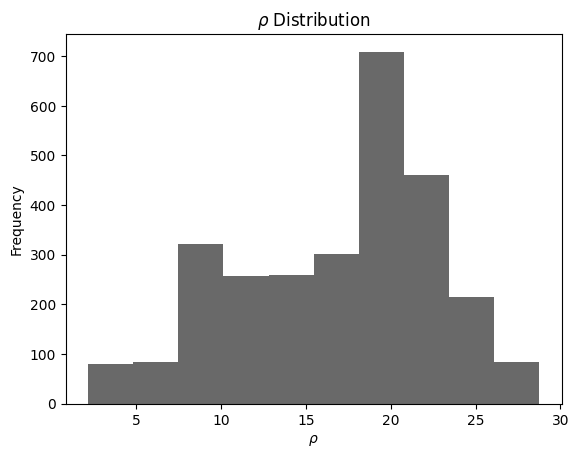


29313 distance distribution:
6.759909318468318 <= $d$ <= 27.071836995131168


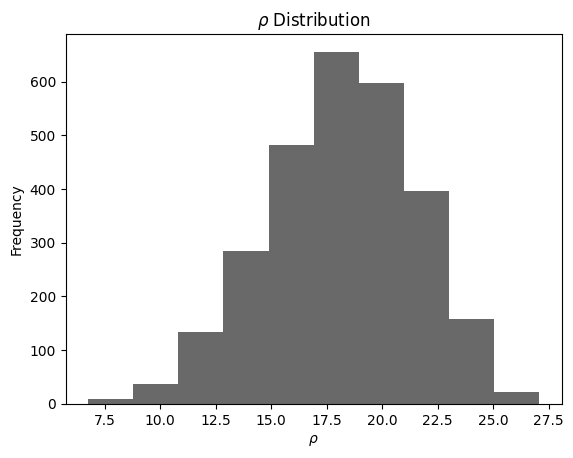


39475 distance distribution:
0.4625312903567422 <= $d$ <= 16.53048569872898


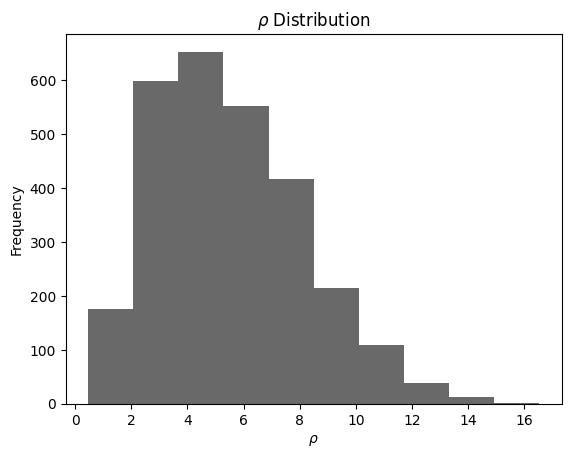


49242 distance distribution:
2.1296543453325167 <= $d$ <= 28.46367331944405


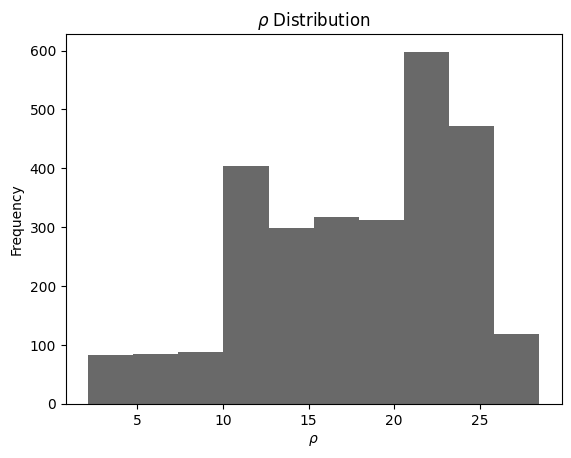


59155 distance distribution:
2.232485204519219 <= $d$ <= 28.64248711783455


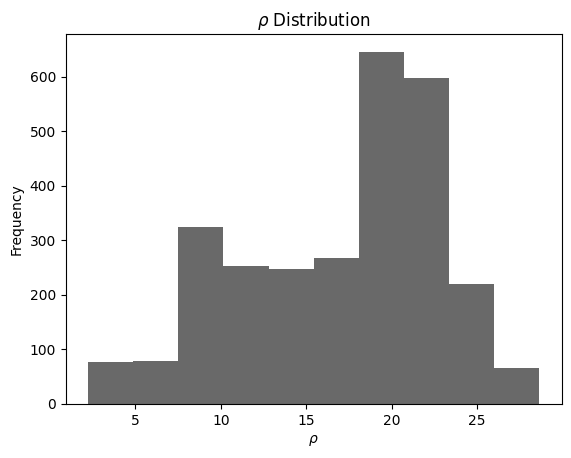


69490 distance distribution:
0.30657924356585586 <= $d$ <= 17.097312992479857


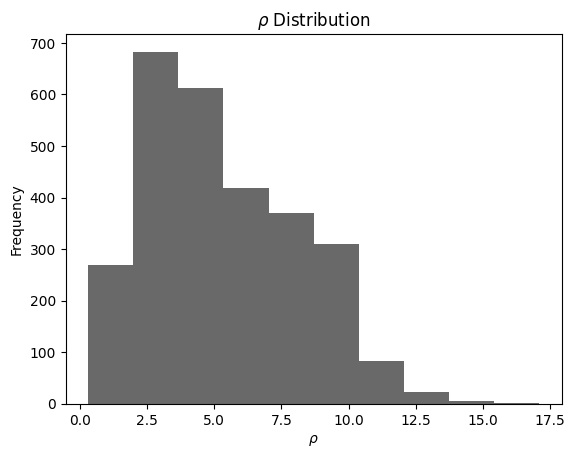


79261 distance distribution:
1.9845560283333858 <= $d$ <= 28.375946700387743


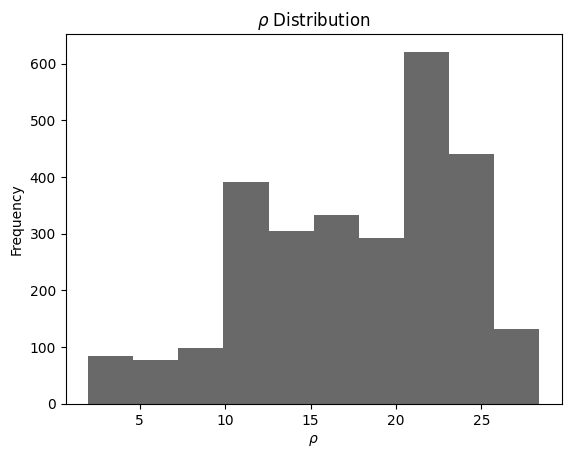


89116 distance distribution:
2.1053097983473816 <= $d$ <= 29.616878735153303


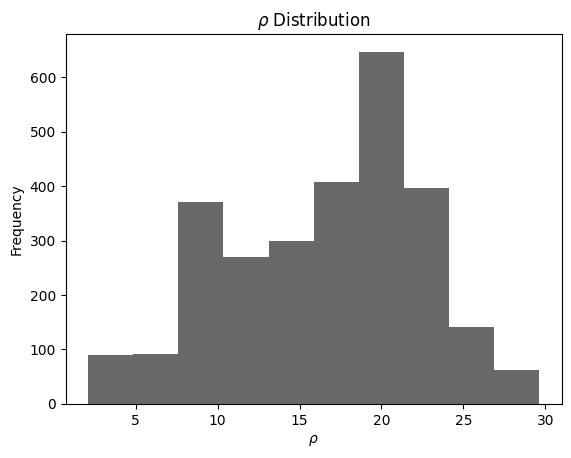


89329 distance distribution:
6.682351320586973 <= $d$ <= 28.12877737545616


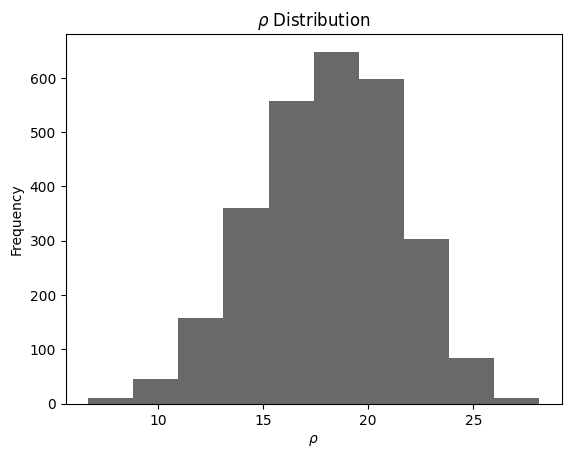


91252 distance distribution:
1.9380964876860194 <= $d$ <= 27.975676451278197


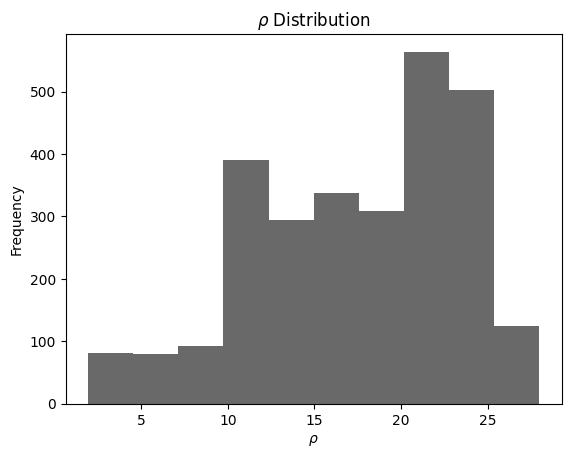


93462 distance distribution:
0.920262235350684 <= $d$ <= 17.652255845218377


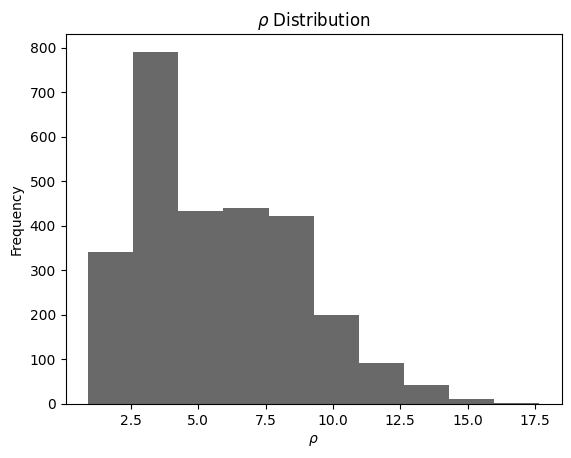


97323 distance distribution:
6.247960647408921 <= $d$ <= 27.182230239237732


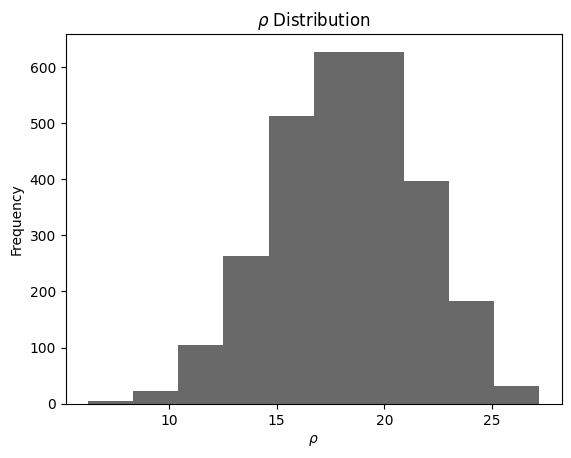

In [71]:
for _id in datasets:
    print(f"{_id} distance distribution:")
    distances = analyze_dmatrix(datasets[_id]['dmatrix'])
    datasets[_id]['distances'] = distances
    print()

These histograms can help provide insight as to the filtration steps at which a significant amount of coalescence will take place.

## 4. Construct a Simplicial Complex

We'll begin by defining a function to handle the generation of balls for a given radius on a dmatrix, as well as a function to generate a simplicial complex from the set of those balls.

In [72]:
def find_balls(dmatrix, radius):
    balls = set()
    for i in range(len(dmatrix)):
        ball_centered_around_i = set()
        for j in range(len(dmatrix)):
            if dmatrix[i][j] < radius:
                ball_centered_around_i.add(j)
        ball = tuple(sorted(ball_centered_around_i))
        balls.add(ball)
    return balls

In [73]:
from itertools import combinations

def generate_simplicial_complexes(balls, verbose=False):
    """
    Treat each set like it represents a simplicial complex, and generate inclusion power sets all the way down
    (simplicial complexes are closed under interection; if (abc), then (ab), (ac), and (bc) must be in the set)
    """
    combs = set()
    for simplicial_complex in balls:
        if verbose:
            print(simplicial_complex, "\n")
        for i in range(1, 4):
            i_length_combos = combinations(simplicial_complex, i)
            for combo in i_length_combos:
                combs.add(tuple(sorted(combo)))
    return combs

    # May need to add a way to compute homologies here? I believe that needs to happen before filtration...

Now, using these functions to build a set of complexes at some subset of the distances at which coalescence occurs in the first dataset, as given by the list `distance` in the dataset's dictionary:

In [74]:
generate_simplicial_complexes(find_balls(datasets['19112']['dmatrix'], 20))

{(11, 24, 41),
 (49, 71, 72),
 (10, 23, 33),
 (17, 59, 62),
 (12, 56, 62),
 (23, 58, 66),
 (16, 56, 70),
 (31, 47, 71),
 (6, 21, 52),
 (1, 31, 65),
 (5, 24, 60),
 (45, 54, 65),
 (16, 27, 71),
 (16, 68, 71),
 (4, 27, 36),
 (3, 30, 44),
 (2, 19, 69),
 (12, 13, 14),
 (6, 16, 51),
 (23, 27, 35),
 (5, 29, 59),
 (9, 42, 74),
 (1, 4, 28),
 (2, 41, 72),
 (22, 28, 59),
 (5, 43, 72),
 (4, 30, 35),
 (32, 44, 69),
 (24, 58, 63),
 (3, 27, 43),
 (9, 16, 69),
 (28, 43, 65),
 (18, 27, 71),
 (25, 30, 38),
 (18, 64, 71),
 (23, 28, 38),
 (33, 38, 65),
 (17, 30, 63),
 (42, 64, 71),
 (24, 29, 46),
 (4, 11, 73),
 (25, 54, 58),
 (29, 63, 65),
 (10, 26, 69),
 (16, 29, 55),
 (22, 27, 62),
 (19, 70, 71),
 (21, 22, 54),
 (38, 39, 62),
 (19, 56, 58),
 (55, 61, 72),
 (4, 61, 68),
 (18, 30, 60),
 (25, 27, 45),
 (1, 20, 33),
 (28, 31, 64),
 (53, 55, 56),
 (0, 23, 41),
 (5, 37, 66),
 (20, 48, 57),
 (23, 68, 71),
 (3, 11, 22),
 (15, 26, 49),
 (35, 62, 69),
 (7, 26, 54),
 (44, 68, 71),
 (47, 68, 71),
 (14, 29, 57),
 (1

In [129]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams
import utils

def filtration(ds, _id, granularity=1):
    """
    Generate a set of simplicial complexes based on the distance set of the complex.
    inputs:
        ds:          the full dictionary of datasets.
        _id:         the ID number of the dataset to be analyzed.
        granularity: the level of detail for the filtration. Default is 1, denoting
                     a computation for every distinct distance found in the dataset.
    """
    ds = ds[_id]
    dist_set = list(sorted({d for d in ds['distances']}))

    if granularity >= 1:
        step_size = 1
    elif granularity > 0:
        step_size = int(len(ds['distances'])*(1-granularity))
    else:
        raise IOError('Your granularity is silliness, don\'t do that.')

    #print(step_size)
    for dist in dist_set[::step_size]:
        balls = find_balls(ds['dmatrix'], dist)
        cmplxs = generate_simplicial_complexes(balls)
        
        # Compute Euler characteristic
        v = len([x for x in cmplxs if len(x) == 1])
        e = len([x for x in cmplxs if len(x) == 2])
        f = len([x for x in cmplxs if len(x) == 3])
        t = len([x for x in cmplxs if len(x) == 4])
        euler_characteristic = v + e - f + t
        print("Euler characteristic: ", euler_characteristic)
        
        # TODO: find H0, H1, H2 homologies
        
        # Compute rank of homologies
        # This can go slow, when our complexes are huge - is stepping through everything too much?
        vectors, mapping = utils.build_custom_complex(cmplxs)
        reverse_mapping = {v:k for k,v in mapping.items()}
        
        boundary_map_d0 = utils.generate_boundary_map(vectors, dim=0, mapping=reverse_mapping)
        boundary_map_d1 = utils.generate_boundary_map(vectors, dim=1, mapping=reverse_mapping)
        boundary_map_d2 = utils.generate_boundary_map(vectors, dim=2, mapping=reverse_mapping)
        boundary_map_d3 = utils.generate_boundary_map(vectors, dim=3, mapping=reverse_mapping)
        
        bmaps = [boundary_map_d0,
                   boundary_map_d1,
                   boundary_map_d2,
                   boundary_map_d3]
        rr_bmaps = [utils.rref_mod_n(map) for map in bmaps]
        
        for dim in range(0,3):
            rank = (rr_bmaps[dim].cols - rr_bmaps[dim].rank()) \
                - rr_bmaps[dim+1].rank()
            if dim == 0:
                homology_rank = rank
            print(f"rank(H_{dim}) = dim(H_{dim}) = {rank}")

        
        # TODO: validate Euler characteristic against homology ranks
        # Should euler characteristic be equal to first homology rank?
        # By the above calculations, this isn't always the case...
        print(homology_rank == euler_characteristic)
        
        # TODO: construct persitence diagrams
        dmatrix = np.asarray(ds['dmatrix'])
        rips = ripser(dmatrix, distance_matrix=True, do_cocycles=False, maxdim=2, thresh=dist)
        diagrams = rips['dgms']                                                   
        plot_diagrams(diagrams, show=True)
        
        # TODO: find out which homologies are persistent & analyze
        # Idk if this can be extracted automatically, or if this comes from reading the graphs?
        
    return cmplxs

Euler characteristic:  75
rank(H_0) = dim(H_0) = 75
rank(H_1) = dim(H_1) = 0
rank(H_2) = dim(H_2) = 0
True


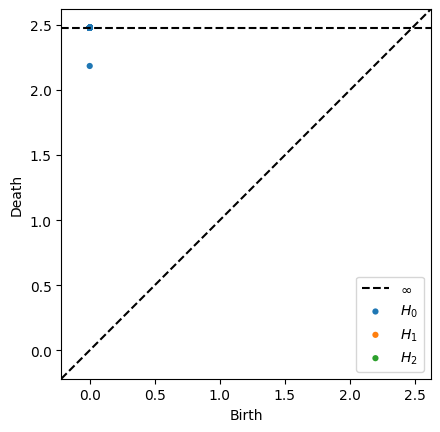

Euler characteristic:  -30
rank(H_0) = dim(H_0) = 3
rank(H_1) = dim(H_1) = 3
rank(H_2) = dim(H_2) = 180
False


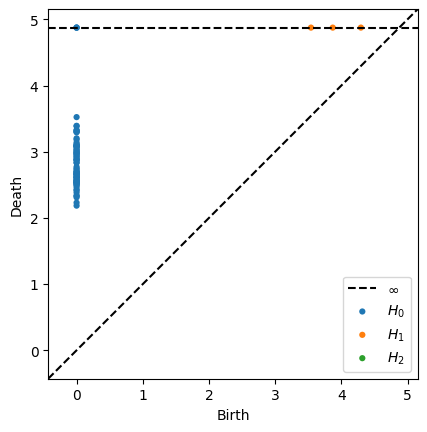

Euler characteristic:  -2033


KeyboardInterrupt: 

In [130]:
complexes_19112 = filtration(datasets, '19112', granularity=.95)

## 5. Computations

In [94]:
import simplicial

c = simplicial.SimplicialComplex()

for i in range(len(datasets['19112']['data'])):
    c.addSimplex(id = i)
    
edges = []
for edge in [x for x in complexes_19112 if len(x) == 2]:
    c.addSimplex(fs = edge)

#for face in [x for x in complexes_19112 if len(x) == 3]:
#    c.addSimplex(fs = face)


KeyboardInterrupt: 

## 6. Persistence Diagrams

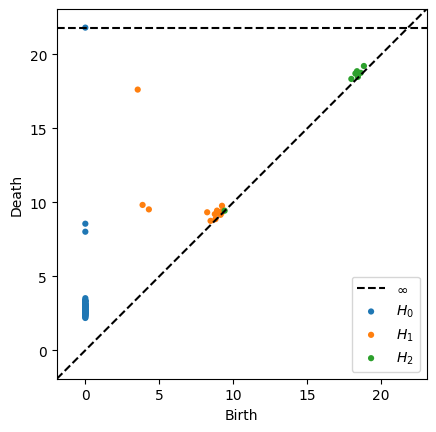

In [48]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams

"""
Sample persistence diagram for 19112, given its distance matrix
"""

test = datasets["19112"]['dmatrix']
data = np.asarray(test)
rips = ripser(data, distance_matrix=True, do_cocycles=True, maxdim=2)
diagrams = rips['dgms']
plot_diagrams(diagrams, show=True)

In [45]:
rips['cocycles']

[[],
 [array([[43, 18,  1],
         [44, 18,  1],
         [42, 18,  1],
         [42, 16,  1],
         [41, 16,  1]], dtype=int64),
  array([[67, 41,  1],
         [65, 41,  1]], dtype=int64),
  array([[31,  7,  1]], dtype=int64),
  array([[73, 47,  1],
         [74, 47,  1],
         [73, 46,  1],
         [72, 47,  1]], dtype=int64),
  array([[68, 42,  1],
         [68, 44,  1],
         [70, 44,  1],
         [67, 42,  1]], dtype=int64),
  array([[25,  0,  1],
         [48,  0,  1]], dtype=int64),
  array([[29,  5,  1],
         [29,  4,  1],
         [29,  3,  1],
         [26,  4,  1]], dtype=int64),
  array([[48, 22,  1],
         [29,  5,  1],
         [48, 23,  1],
         [29,  4,  1],
         [25,  0,  1],
         [29,  3,  1],
         [48,  0,  1],
         [26,  0,  1],
         [31,  7,  1],
         [25,  1,  1],
         [26,  4,  1],
         [26,  1,  1],
         [28,  4,  1],
         [26,  3,  1],
         [48, 24,  1],
         [48, 21,  1],
         [31,  5

## 7. Find Persistent Homologies